In [1]:
import numpy as np
from qiskit.qobj.utils import MeasLevel
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import T1
from qiskit_experiments.library.characterization.analysis.t1_analysis import T1KerneledAnalysis

# A T1 simulator
from qiskit.providers.fake_provider import FakePerth, FakeCairo
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# A kerneled data simulator
from qiskit_experiments.test.mock_iq_backend import MockIQBackend
from qiskit_experiments.test.mock_iq_helpers import MockIQT1Helper

# Create a pure relaxation noise model for AerSimulator
noise_model = NoiseModel.from_backend(
    FakeCairo(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
backend = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)

# Look up target T1 of qubit-0 from device properties
qubit0_t1 = FakePerth().qubit_properties(0).t1

# Time intervals to wait before measurement
delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)
# Create an experiment for qubit 0
# with the specified time intervals
exp = T1(physical_qubits=(0,), delays=delays)

# Set scheduling method so circuit is scheduled for delay noise simulation
exp.set_transpile_options(scheduling_method='asap')

# Run the experiment circuits and analyze the result
exp_data = exp.run(backend=backend, seed_simulator=101).block_for_results()

# Print the result
display(exp_data.figure(0))
for result in exp_data.analysis_results():
    print(result)

TypeError: cannot pickle '_abc._abc_data' object

/Users/pcchen/miniforge3/lib/python3.10/site-packages/qiskit_aer/noise/device/models.py:145: UserWarning: When `target` is supplied, `standard_gates` and `warnings` are ignored, and they are always set to true.
  warn("When `target` is supplied, `standard_gates` and `warnings` are ignored,"


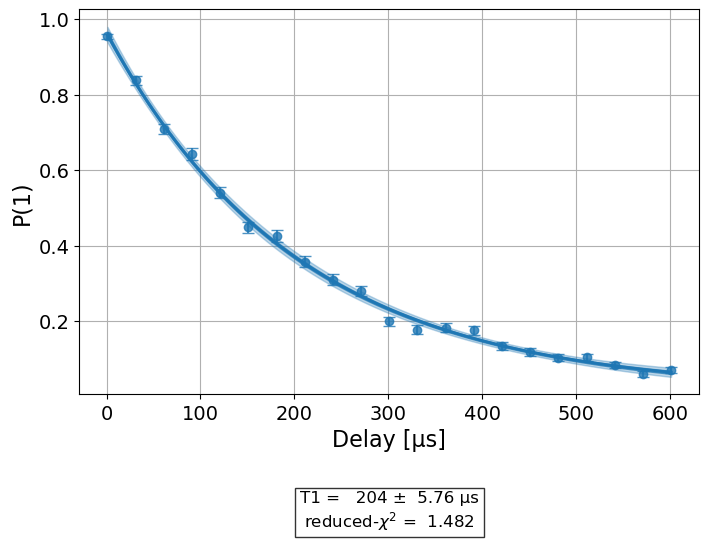

AnalysisResult
- name: @Parameters_T1Analysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 20
 - degree of freedom: 18
 - chi-square: 26.67902309616341
 - reduced chi-square: 1.482167949786856
 - Akaike info crit.: 11.026458508418633
 - Bayesian info crit.: 14.160025821588903
 - init params:
  * amp = 0.8956097560975609
  * tau = 0.00022093155099248824
  * base = 0.06
 - fit params:
  * amp = 0.9496488588225825 ± 0.008537676528327045
  * tau = 0.00020423335662893706 ± 5.7594420613327606e-06
  * base = 0.014366168250429225 ± 0.007762395544941538
 - correlations:
  * (tau, base) = -0.9029226499802608
  * (amp, base) = -0.6378776642667887
  * (amp, tau) = 0.40535095610314054
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T1
- value: 0.000204+/-0.000006
- χ²: 1.482167949786856
- quality: good
- extra: <1 items>
- device_co

In [14]:
import numpy as np
from qiskit.qobj.utils import MeasLevel
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import T1
from qiskit_experiments.library.characterization.analysis.t1_analysis import T1KerneledAnalysis

# A T1 simulator
from qiskit.providers.fake_provider import *
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# A kerneled data simulator
from qiskit_experiments.test.mock_iq_backend import MockIQBackend
from qiskit_experiments.test.mock_iq_helpers import MockIQT1Helper

# Create a pure relaxation noise model for AerSimulator
noise_model = NoiseModel.from_backend(
    FakePerth(), thermal_relaxation=True, gate_error=False, readout_error=False
)

# Create a fake backend simulator
# backend = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)
backend = FakePerth()
# backend = FakeAuckland()

# Look up target T1 of qubit-0 from device properties
qubit0_t1 = FakePerth().qubit_properties(0).t1

# Time intervals to wait before measurement
delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)
# Create an experiment for qubit 0
# with the specified time intervals
exp = T1(physical_qubits=(0,), delays=delays)

# Set scheduling method so circuit is scheduled for delay noise simulation
exp.set_transpile_options(scheduling_method='asap')

# Run the experiment circuits and analyze the result
exp_data = exp.run(backend=backend, seed_simulator=101).block_for_results()

# Print the result
display(exp_data.figure(0))
for result in exp_data.analysis_results():
    print(result)